# Descriptive Statistics

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('processed_data.csv')

## Understanding the data

In [3]:
# number of cities
print(dataset['City'].nunique())   
# date range
print(dataset['Date'].min(), dataset['Date'].max()) 
dataset.info()

26
2015-01-01 2020-07-01
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  AQI         29531 non-null  float64
 14  AQI_Bucket  29531 non-null  object 
dtypes: float64(12), object(3)
memory usage: 3.4+ MB


## Summary Statistics

In [4]:
dataset.groupby('City')[['PM2.5','PM10','NO2','O3']].describe()

PM2.5                                                 \
                     count        mean        std    min      25%     50%   
City                                                                        
Ahmedabad           2009.0   64.889706  33.032686   3.04  46.9100  58.370   
Aizawl               113.0   17.012301  15.176458   0.16   3.8500  10.480   
Amaravati            951.0   37.167818  26.500669   4.65  17.7650  28.015   
Amritsar            1221.0   54.275520  48.748172   2.85  33.2000  44.090   
Bengaluru           2009.0   35.463743  21.293691   1.72  21.9400  30.920   
Bhopal               289.0   49.897024  29.966089   3.40  23.8800  44.840   
Brajrajnagar         938.0   63.381588  32.429408   2.54  40.3300  60.630   
Chandigarh           304.0   40.742401  27.554687   6.86  20.1775  33.270   
Chennai             2009.0   50.141376  25.939404   6.55  34.2000  45.545   
Coimbatore           386.0   29.138394  11.033954   2.13  21.1450  28.515   
Delhi               2009.0  117.173678  82.874704  10.24  57.1000  94.620   
Ernakulam            162.0   24.816605  14.813385   3.48  14.1475  19.755   
Gurugram            1679.0  114.631751  94.721693   3.42  60.3650  90.150   
Guwahati             502.0   63.651753  61.574857   5.39  23.4500  46.780   
Hyderabad           2006.0   46.746690  37.419836   4.83  26.8225  42.000   
Jaipur              1114.0   54.449533  26.412859   9.12  36.5850  49.750   
Jorapokhar          1169.0   61.837348  18.598968  10.04  60.6900  60.690   
Kochi                162.0   31.428519  20.049744   5.97  16.4150  24.285   
Kolkata              814.0   62.956560  56.613595   3.56  22.3700  43.550   
Lucknow             2009.0  108.514629  77.875521  11.39  49.2700  86.090   
Mumbai              2009.0   28.214617  17.119620   3.84  23.7450  23.745   
Patna               1858.0  117.904634  86.516208  10.78  57.7700  91.120   
Shillong             310.0   28.057742  74.677330   2.03  12.5425  17.425   
Talcher              925.0   58.070465  45.360279   0.04  29.5300  44.640   
Thiruvananthapuram  1112.0   27.822968  17.510580   2.00  15.1200  22.380   
Visakhapatnam       1462.0   45.969124  25.858093   2.00  29.2725  40.610   

                                        PM10              ...      NO2  \
                         75%     max   count        mean  ...      75%   
City                                                      ...            
Ahmedabad            73.0700  381.69  2009.0  109.301951  ...  66.4300   
Aizawl               28.3300   54.90   113.0   23.313982  ...   0.4200   
Amaravati            50.4850  139.38   951.0   75.698838  ...  24.7350   
Amritsar             60.5400  868.66  1221.0  114.319640  ...  20.8000   
Bengaluru            42.9200  313.59  2009.0   82.189039  ...  34.1500   
Bhopal               69.5800  136.42   289.0  119.360467  ...  46.2200   
Brajrajnagar         78.8575  308.79   938.0  123.330725  ...  19.9225   
Chandigarh           53.2050  154.85   304.0   85.656546  ...  13.8075   
Chennai              60.1500  293.43  2009.0   52.137484  ...  19.5500   
Coimbatore           36.2125   63.10   386.0   37.950181  ...  41.8625   
Delhi               152.9900  685.36  2009.0  232.192952  ...  63.5700   
Ernakulam            35.7225   78.27   162.0   48.244259  ...   3.1050   
Gurugram            139.8900  949.99  1679.0  182.883734  ...  26.7450   
Guwahati             91.4900  916.67   502.0  116.604900  ...  16.4425   
Hyderabad            60.6475  571.02  2006.0   92.382532  ...  38.7775   
Jaipur               66.6800  311.35  1114.0  123.399829  ...  40.1050   
Jorapokhar           60.6900  217.13  1169.0  143.771450  ...   9.8200   
Kochi                45.7700  143.85   162.0   67.335432  ...  19.3450   
Kolkata              84.7825  304.74   814.0  113.341695  ...  54.3925   
Lucknow             149.6800  742.67  2009.0  100.685000  ...  45.8900   
Mumbai               23.7450  134.32  2009.0   85.044778  ...  21.4600   
Patna      

# Data Visualization

## Plots for Numeric Columns 

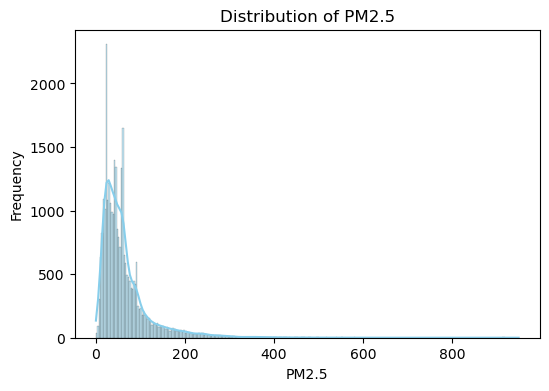

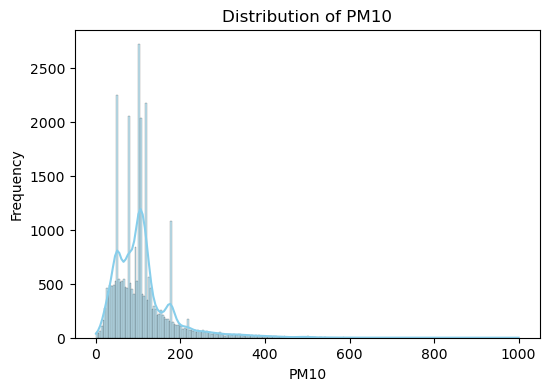

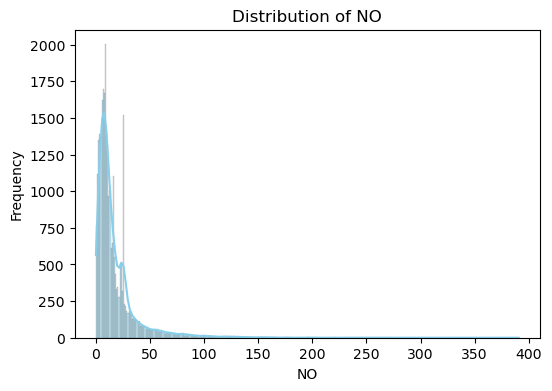

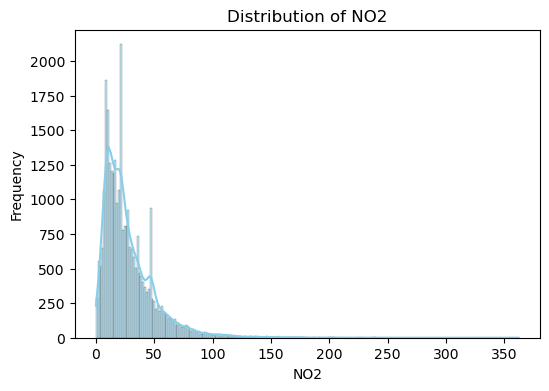

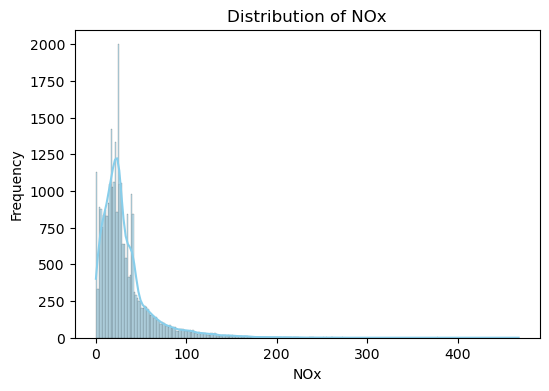

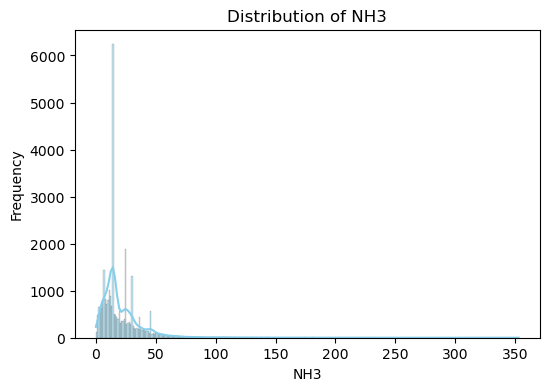

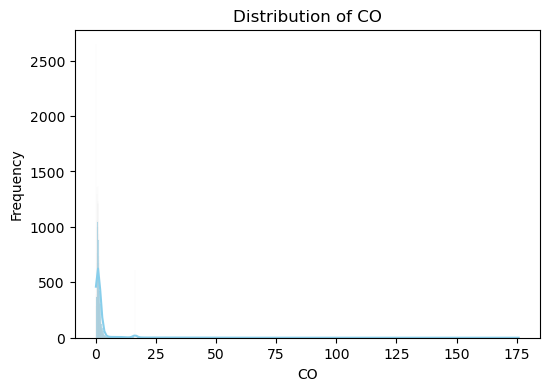

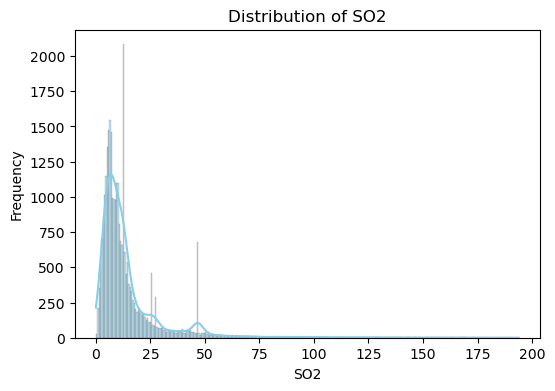

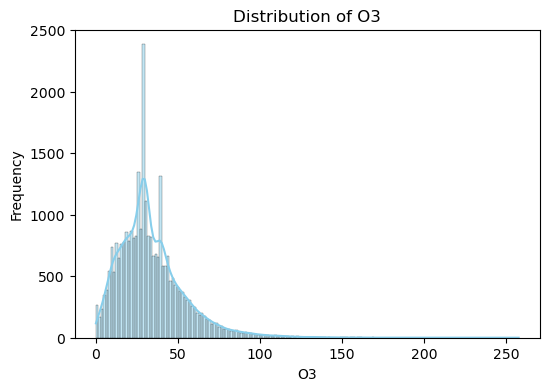

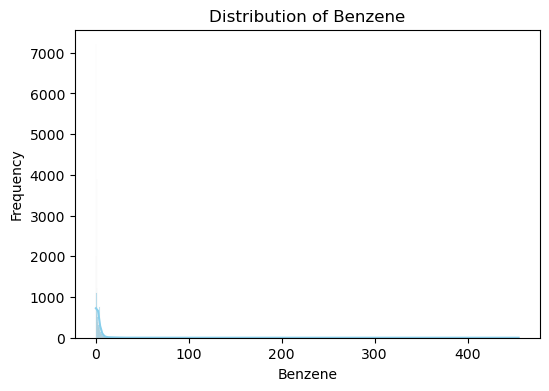

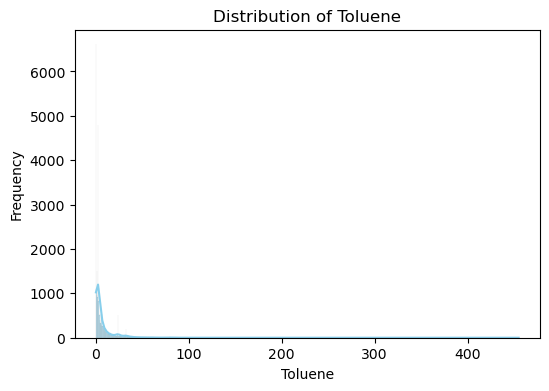

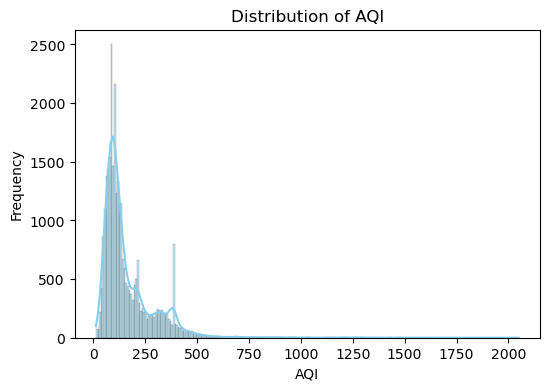

In [7]:
# Distribution Plots for Numeric Columns
numeric_cols = dataset.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(dataset[col], kde=True, color='skyblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

## AQI_Bucket count

C:\Users\todaw\AppData\Local\Temp\ipykernel_23292\1937721400.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dataset, x='AQI_Bucket', palette='viridis')


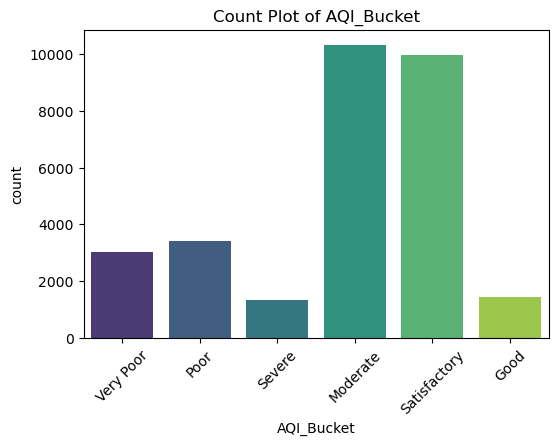

In [13]:
#Visualizing the AQI_Bucket count 
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='AQI_Bucket', palette='viridis')
plt.title("Count Plot of AQI_Bucket")
plt.xticks(rotation=45)
plt.show()

## Correlation Between Pollutants

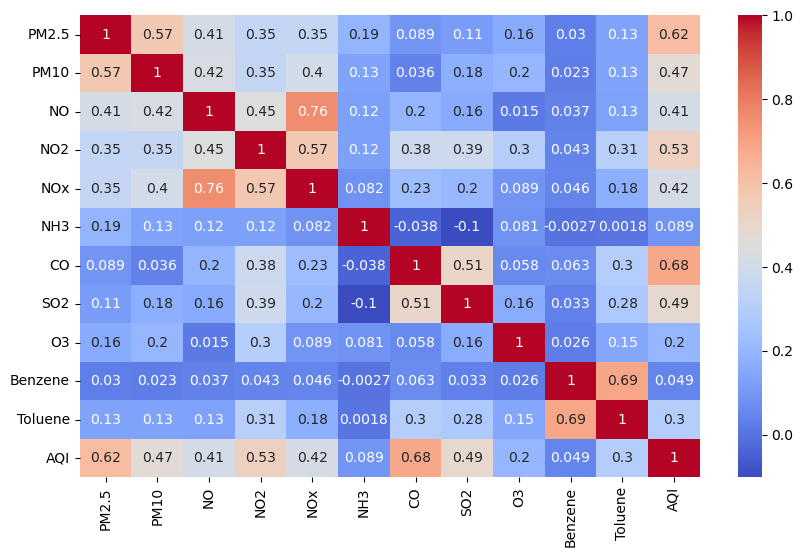

In [14]:
#Heatmap of correlations between pollutants.
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(dataset[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.show()